<br/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="left"/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="right"/>
<div align="center">
<h2>Bootcamp Data Science - Módulo 2</h2><br/>
<h1>Introducción a Machine Learning</h1>
<br/><br/>
    <b>Instructor Principal:Jesús Ortiz jortiz@codingdojo.cl<br/><br/>
    <b>Coding Dojo</b>
</div>
<br>
Fuente: "Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow"

# ¿Qué es Machine Learning?

- Machine Learning (de ahora en adelante, **ML**), se define como el conjunto de técnicas a través de los cuales un computador puede aprender de los datos.

<img src="images/diagrama.png" alt="" width="800px" align="center"/>

# ¿Por qué utilizar Machine Learning?

### Ej. Creación de un filtro de spam para correos electrónicos

- Aproximación tradicional

<img src="images/withoutML.png" alt="" width="500px" align="center"/>

# ¿Por qué utilizar Machine Learning?

### Ej. Creación de un filtro de spam para correos electrónicos

- Aproximación de ML

<img src="images/withML.png" alt="" width="500px" align="center"/>

# Tipos de algoritmos de ML

Existen distintas clasificaciones

- Algoritmos entrenados con o sin supervisión humana:
    * Supervisados
    * No supervisados
    * Semi supervisados
    * Por refuerzo
- Algoritmos de aprendizaje incremental:
    * Online
    * Offline/por lote (batch)
- Algoritmos de detección de patrones o de comparación:
    * Basados en instancia
    * Basados en modelo

# Bibliotecas para ML python

<img src="images/bibliotecas.png" alt="" width="800px" align="center"/>

# Scikit-Learn

<img src="images/ml-libraries/scikit-learn-logo-notext.png" alt="" width="200px" align="center"/>

- Biblioteca para ML de código libre
- Biblioteca para Python
- Soporta múltiples algoritmos tanto supervisados como no supervisados
-  Si está trabajando en su entorno local, previo a su importación debe ser **instalada** 
    - ```pip install scikit-learn``` si usa ```pip```
    - ```conda install scikit-learn``` si usa ```conda```

# Scikit-Learn: Utilización

Todo los objetos Scikit-Learn son consistentes entre sí
* **Estimadores:** 
    - Método encargado de la **estimación** de los parámetros asociados al algoritmo. 
    - Objetos Scikit-Learn incluyen el método *fit()*, cuya entrada es el set de datos utilizados para el cálculo de los parámetros.
* **Transformadores:** 
    - Método encargado de la **transformación** de datos en base a los parámetros calculados por método *fit()*. 
    - Objetos Scikit-Learn incluyen el método *transform()*, que recibe con los datos a transformar.
    - Método *fit_transform()* permite realizar ambos pasos con un solo método.
* **Predictores:** 
    - Método encargado de hacer **predicciones** en base a datos de entrada.
    - Objetos Scikit-Learn incluyen el método *predict()*, para realizar predicciones en base a parámetros de entrada.
        
Cuáles de estos métodos están presentes, dependerá del tipo algoritmo a utilizar.
    

# Escalamiento

- Modificación del rango de valores de una característica
- Tipos comunes de escalamiento:
    * Escalamiento min-max (normalización): Rango entre 0 (mínimo) y 1 (máximo)
    * Estandarización: Escalamiento a media cero y varianza unitaria
    

# Estandarización con Scikit-Learn

In [44]:
import pandas as pd
df = pd.read_csv('data/housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [17]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,precio_escalado
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1.000000
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,0.921053
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,0.921053
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,0.918421
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,0.857895


In [12]:
df['precio_escalado']=df['price']

In [15]:
df['precio_escalado']=df['precio_escalado']/max(df['precio_escalado'])

In [18]:
min(df['precio_escalado'])

0.13157894736842105

# Estandarización con Scikit-Learn

In [33]:
import matplotlib.pyplot as plt

In [31]:
# Esta biblioteca se encarga de el escalamiento por estandarización
# Es decir, bajo el supuesto que los datos se comportan como una 
# distribución normal
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() # Creación de objeto StandardScaler
scaler.fit(df[['price']]) # Cálculo de parámetros de escalamiento
print('Media de los datos', scaler.mean_)
print('Varianza de los datos', scaler.var_)
price_scaled = scaler.transform(df[['price']]) # Transformación de los datos

plt.hist(price_scaled, bins=20)

KeyError: "None of [Index(['price'], dtype='object')] are in the [columns]"

# Estandarización con Scikit-Learn

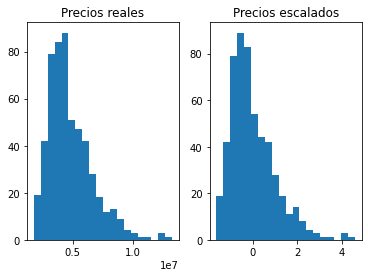

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax1.hist(df['price'], bins=20)
ax1.set_title('Precios reales')

ax2 = fig.add_subplot(1,2,2)
ax2.hist(price_scaled, bins=20)
ax2.set_title('Precios escalados')

plt.show()

In [10]:
min(price_scaled)

array([-1.61432675])

In [11]:
min(df['price'])

1750000

# Regresión Lineal

- Modelo que permite realizar predicciones bajo el *supuesto* que los datos se comportan de manera lineal
- **Recordatorio:** Ecuación de la recta 2-Dimensiones

$$ y = m x + b$$
    
- $m$ : pendiente de la recta
- $b$ : intercepto con el eje y

In [23]:
y_noise = (4*np.random.rand(len(y)) - 2) + y 
y_noise

array([ 3.44741158,  2.55797544,  4.16857859,  5.46544737,  6.82427994,
        9.14070385,  7.79869513, 10.05693775, 11.36965828, 10.18580165,
       13.43017941, 12.68209649, 13.26020637, 17.79554215, 18.86252813,
       19.23358939, 18.21845508, 18.39068846, 21.73693211, 21.76060997])

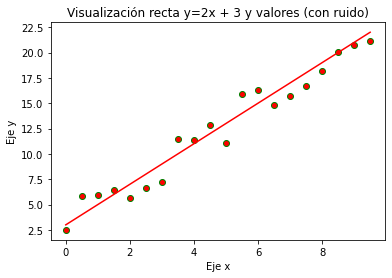

In [7]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42) # Semilla para el generador aleatorio. 42 porque es el significado del universo y la vida :)

x = np.arange(0,10,0.5) # Generar todos los valores en el eje x
# La ecuación de la recta es y = mx + b
m = 2 # Pendiente
b = 3 # Intercepto
y = m*x + b # Recta con pendiente m=2 e intercepto b = 3
y_noise = (4*np.random.rand(len(y)) - 2) + y # Agregar ruido a los datos para emular una situación real

# y_noise representa los datos con los que tu trabajarías en la realidad

plt.plot(x,y_noise,'go', markerfacecolor="#ff0000")
plt.plot(x, y, '-r')
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.title('Visualización recta y=2x + 3 y valores (con ruido)')
plt.show()

# Regresión Lineal

- Generalización: plano n-dimensional

$$ y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$$

- $\theta_j$ pendiente en la dimension $j$
- $\theta_0$ intercepto con eje $y$. También es llamado **bias** (prejuicio)

### ¿Cuál es la recta que mejor representa mis datos?

# Regresión Lineal con Scikit-Learn

### Toolbox de librerias

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import precision_recall_fscore_support
from sklearn.neighbors import KNeighborsRegressor

In [32]:
X = x.reshape(-1,1)
X

array([[0. ],
       [0.5],
       [1. ],
       [1.5],
       [2. ],
       [2.5],
       [3. ],
       [3.5],
       [4. ],
       [4.5],
       [5. ],
       [5.5],
       [6. ],
       [6.5],
       [7. ],
       [7.5],
       [8. ],
       [8.5],
       [9. ],
       [9.5]])

In [33]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() # Creación de objeto Regresor lineal Scikit-Learn
X = x.reshape(-1,1) # Generación de vector columna
lin_reg.fit(X, y_noise) # Cálculo de parámetros \theta_0, \theta_1... etc
print('El bias calculado es', lin_reg.intercept_, '. El bias real es ', b)
print('La pendiente calculada es: ', lin_reg.coef_, '. La pendiente real es ', m) 
# lin_reg.coef es una lista porque pueden ser múltiples parámetros


El bias calculado es 2.5315403705217285 . El bias real es  3
La pendiente calculada es:  [2.06058431] . La pendiente real es  2


In [34]:
print('Valor real para x=20 es', m*20 + b)

Valor real para x=20 es 43


In [35]:
# Predicción
print('Para x=20, el valor predecido (y) es',lin_reg.predict([[20]]))

Para x=20, el valor predecido (y) es [43.74322663]


# Regresión Lineal con Scikit-Learn

In [37]:
X_new = np.arange(10,20,0.5).reshape(-1,1)
X_new

array([[10. ],
       [10.5],
       [11. ],
       [11.5],
       [12. ],
       [12.5],
       [13. ],
       [13.5],
       [14. ],
       [14.5],
       [15. ],
       [15.5],
       [16. ],
       [16.5],
       [17. ],
       [17.5],
       [18. ],
       [18.5],
       [19. ],
       [19.5]])

In [39]:
lin_reg.predict(X_new)

array([23.1373835 , 24.16767566, 25.19796781, 26.22825997, 27.25855213,
       28.28884428, 29.31913644, 30.3494286 , 31.37972075, 32.41001291,
       33.44030506, 34.47059722, 35.50088938, 36.53118153, 37.56147369,
       38.59176585, 39.622058  , 40.65235016, 41.68264232, 42.71293447])

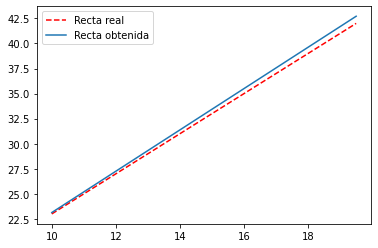

In [42]:
# Predicción con nuevos valores
X_new = np.arange(10,20,0.5).reshape(-1,1)
y_new = m*X_new + b
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(X_new, y_new, '--r')
ax.plot(X_new, lin_reg.predict(X_new))
ax.legend(['Recta real','Recta obtenida'])
plt.show()

In [40]:
y_pred=lin_reg.predict(X_new)

In [43]:
from sklearn.metrics import r2_score
r2_score(y_new, y_pred)

0.9936459893471847

In [46]:
len(price_scaled)

545

In [47]:
len(df['area'])

545

In [73]:
X_train=df['area'][0:381]
X_test=df['area'][381::]

In [49]:
y_train=price_scaled[0:381]
y_test=price_scaled[381::]

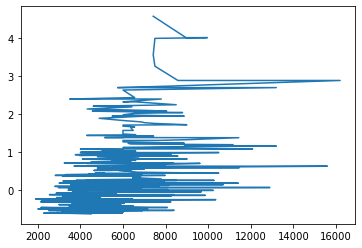

In [71]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(X_train, y_train,)
plt.show()

In [76]:
lin_reg = LinearRegression() # Creación de objeto Regresor lineal Scikit-Learn
X_train = X_train.values.reshape(-1,1) # Generación de vector columna
lin_reg.fit(X_train, y_train) # Cálculo de parámetros \theta_0, \theta_1... etc

LinearRegression()

In [68]:
y_pred=lin_reg.predict(X_test.values.reshape(-1,1))
r2_score(y_test, y_pred)

-17.68933791721613

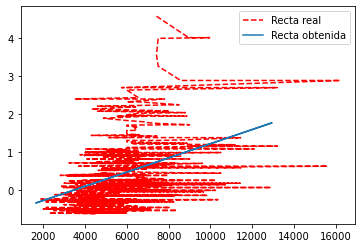

In [77]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,  '--r')
ax.plot(X_test,lin_reg.predict(X_test.values.reshape(-1,1)))
ax.legend(['Recta real','Recta obtenida'])
plt.show()

# KNN - K Nearest Neighbors (K Vecinos más próximos)

- Uno de los algoritmos de ML más simple de implementar
- Permite clasificación y regresión de datos

# KNN con Scikit-Learn

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
data = load_iris()
data.feature_names
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
df['target'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['target']) # Separación de las características
y = df['target'] # Separación del target (corresponde a lo que quiero predecir)
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=123)
##Lo normal, o incluso by default es 30%
X_train


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,5.8,2.8,5.1,2.4
136,6.3,3.4,5.6,2.4
53,5.5,2.3,4.0,1.3
19,5.1,3.8,1.5,0.3
38,4.4,3.0,1.3,0.2
...,...,...,...,...
17,5.1,3.5,1.4,0.3
98,5.1,2.5,3.0,1.1
66,5.6,3.0,4.5,1.5
126,6.2,2.8,4.8,1.8


In [30]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) # Ojo: escalamiento de test se hace en base al train

In [31]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train) # Ojo: fit en base a los de entrenamiento!!

KNeighborsClassifier(n_neighbors=3)

In [34]:
predictions = knn.predict(X_test)
predictions

array([2, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [37]:
print('Valores predichos',predictions.tolist())
print('Valores reales',y_test.tolist())
print('Accuracy:',knn.score(X_test, y_test))

Valores predichos [2, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2, 2]
Valores reales [1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2, 2]
Accuracy: 0.9111111111111111


# Actividad 4

Scikit-Learn no es solo una potente herramienta para la aplicación de distintos algoritmos de ML, sino que también provee algunos populares set de datos con los cuales puedes probar tanto algoritmos de clasificación como de regresión

- Estudie los datasets disponibles en Scikit-learn [aquí](https://scikit-learn.org/stable/datasets/toy_dataset.html) y cómo utilizarlos.
- Descargue el dataset **Diabetes dataset** disponible en Scikit-Learn.
- Utilice un regresor lineal y KNN para la progresión de la enfermedad. 
- Compare gráficamente ambas técnicas.

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
data = load_diabetes()

In [2]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [3]:
df["progreso"]=data.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progreso
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
r2=0
X = df.drop(columns=['progreso','sex']) # Separación de las características
y = df['progreso'] # Separación del target (corresponde a lo que quiero predecir)
knn = KNeighborsRegressor(n_neighbors=9)
while (r2<=0.6):    
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
    knn.fit(X_train, y_train) # Ojo: fit en base a los de entrenamiento!!
    y_pred=knn.predict(X_test)
    r2=r2_score(y_test, y_pred)
    print(r2)

0.343404348493035
0.3307186243654272
0.4350591504408886
0.33854017846903794
0.4155715602364628
0.3644263133411002
0.43600964832444655
0.3852223881674053
0.40947927198313194
0.30480352759981055
0.4566108450399682
0.43605977507777105
0.3753062190294021
0.3182707656313031
0.4658538572830375
0.4053701416124583
0.4762075090042194
0.4163213740391687
0.47932989262407677
0.38329643354585063
0.3728820606011186
0.442984066108562
0.41216313910473945
0.45751217912841846
0.46086350751473415
0.3860957600705349
0.4659215170771055
0.4248525445484813
0.3159574036064481
0.3906557782085711
0.4478812719074218
0.4219737224354291
0.38404384675806813
0.35244375287376983
0.33035630986943587
0.5551875554543424
0.37765466869616005
0.4876676732359774
0.4085219016541569
0.3895500215137154
0.29716965733387457
0.3599804123337237
0.4451888449149183
0.38927841674738517
0.4387024015544123
0.4361285360784819
0.4646040955127695
0.5211640764157732
0.40051742467725404
0.4443848455650161
0.3750252879270737
0.40940791762868

0.4228189367019487
0.48155768074597116
0.4150222695821867
0.4329692963083014
0.3830387452304378
0.4507987499213597
0.3605027098238539
0.3822544317307506
0.4164158082928744
0.35287527331683377
0.3550904476741358
0.41003082384829825
0.441365504087352
0.5182742389625186
0.4479936073700672
0.4291543370963492
0.4110340918613724
0.48005488146029385
0.42053560928246425
0.31555090838391664
0.3080560018828814
0.4337413228000657
0.4122103871004794
0.43707393909073733
0.47895614189170765
0.4579169825684265
0.4109295872603468
0.3411319826913045
0.44073344313233975
0.4235066427931109
0.4793337072468655
0.41988541663385714
0.36965241600190857
0.3225818679976694
0.42071200033270806
0.3238146011633719
0.36415202014280323
0.40204334005940434
0.5008297115264273
0.4417386794450182
0.4267884276186096
0.42107863657705025
0.423854213809443
0.4393210327839119
0.43083257798651986
0.40582389384111883
0.46825424000180604
0.5131805595208818
0.4544156170224716
0.4266361845442591
0.38732853608302864
0.353526872146

KeyboardInterrupt: 

In [41]:
r2=0
neighbors = np.arange(1,20)
X = df.drop(columns=['progreso']) # Separación de las características
while (r2<=0.58): 
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    for i,k in enumerate(neighbors):
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)    
        y_pred=knn.predict(X_test)
        r2=r2_score(y_test, y_pred)
print(r2)
print(k)

0.6142676042203117
19


In [42]:
r2=r2_score(y_test, y_pred)
r2

0.6142676042203117

In [43]:
knn

KNeighborsRegressor(n_neighbors=19)

In [44]:
y_test

28     131.0
114    258.0
358     90.0
398    242.0
196     72.0
       ...  
405    281.0
194     86.0
292     84.0
404    293.0
386     72.0
Name: progreso, Length: 89, dtype: float64

In [45]:
y_pred

array([125.21052632, 232.68421053,  93.42105263, 140.05263158,
       108.57894737, 114.42105263, 106.42105263, 136.15789474,
        88.05263158, 146.73684211, 157.05263158, 215.84210526,
       157.68421053,  88.05263158, 187.10526316, 249.05263158,
       137.73684211, 169.78947368, 138.42105263, 119.05263158,
       103.78947368, 101.31578947, 112.21052632, 107.31578947,
       187.94736842, 155.47368421, 205.21052632, 249.36842105,
       197.15789474, 131.68421053, 201.63157895, 112.68421053,
        99.21052632, 182.36842105, 143.94736842, 115.52631579,
       132.84210526, 100.36842105, 232.05263158,  88.73684211,
       137.26315789, 161.52631579, 103.47368421, 133.47368421,
       228.15789474, 148.89473684, 165.84210526, 155.89473684,
       166.68421053, 127.68421053, 239.47368421, 215.63157895,
       252.36842105, 169.84210526, 109.89473684, 181.78947368,
       127.15789474, 135.42105263, 177.31578947, 166.63157895,
        89.94736842,  94.05263158, 176.63157895, 214.84

In [55]:
r2=r2_score(y_test, y_pred)
r2

0.5570055756728347

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
r2=0
X = df.drop(columns=['progreso']) # Separación de las características
y = df['progreso'] # Separación del target (corresponde a lo que quiero predecir)
scaler = StandardScaler()
while (r2<=0.55):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)    
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test) # Ojo: escalamiento de test se hace en base al train
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train) # Ojo: fit en base a los de entrenamiento!!
    y_pred=knn.predict(X_test)
    r2=r2_score(y_test, y_pred)
    print(r2)

In [46]:
from sklearn.datasets import load_wine
data = load_wine()

In [47]:
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1